In [ ]:
! pip install optbinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=

In [ ]:
from optbinning import BinningProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_excel('dataset5.xlsx')
train_data

Клиент  R(Давность)  F(Частота)  М(Сумма)  Кол-во виз. в выходные  \
0          client1          616           4      2273                     NaN   
1         client10           56           3      4757                     NaN   
2        client100          145           1      7299                     NaN   
3       client1000           16          36     36495                    16.0   
4      client10000          425           5      8495                     NaN   
...            ...          ...         ...       ...                     ...   
41191   client9995          303           3      3677                     3.0   
41192   client9996          425           1      2499                     NaN   
41193   client9997           27           3     17691                     NaN   
41194   client9998            2          80     38666                    25.0   
41195   client9999          212          20     13651                    19.0   

       Ср. кол-во дней между покупками  Событие  Разнообразие ТГ  \
0                                  NaN        0                2   
1                                  NaN        0                1   
2                                  NaN        1                1   
3                            30.583333        1                5   
4                                  NaN        0                1   
...                                ...      ...              ...   
41191                         7.000000        0                1   
41192                              NaN        0                1   
41193                        60.000000        0                2   
41194                        15.516129        0               13   
41195                       191.500000        0                6   

       Среднее количество товаров в чеке  Разнообразие товаров  \
0                               2.250000                     4   
1                               1.000000                     3   
2                               1.000000                     1   
3                               4.611111                    31   
4                               1.000000                     5   
...                                  ...                   ...   
41191                           1.000000                     3   
41192                           1.000000                     1   
41193                           8.000000                     3   
41194                           3.100000                    37   
41195                           2.100000                    20   

       Сумма потраченная в последний визит  
0                                     2273  
1                                     4757  
2                                     7299  
3                                     4703  
4                                     8495  
...                                    ...  
41191                                 1499  
41192                                 2499  
41193                                15293  
41194                                  598  
41195                                 5521  

[41196 rows x 11 columns]

In [ ]:
selection_criteria = {
    "iv":
        {
            "min": 0.02,
            "max": 2.5,
            "strategy": "highest",
            "top": 10
        },
    "quality_score":
        {
            "min": 0.01
        }
}

print('Succesfull!')

Succesfull!


In [ ]:
variable_names = list(train_data.iloc[:, ~train_data.columns.isin(['Клиент', 'Событие'])])
X = train_data[variable_names]
Y = train_data['Событие'].values

print('Succesfull!')

Succesfull!


Инициализация BinningProcess

In [ ]:
binning_process = BinningProcess(variable_names=variable_names, selection_criteria=selection_criteria, max_n_bins=5)
binning_process.fit(X=X, y=Y)
binning_process.summary()

name      dtype   status  selected n_bins  \
0                          R(Давность)  numerical  OPTIMAL      True      5   
1                           F(Частота)  numerical  OPTIMAL      True      5   
2                             М(Сумма)  numerical  OPTIMAL      True      5   
3               Кол-во виз. в выходные  numerical  OPTIMAL      True      5   
4      Ср. кол-во дней между покупками  numerical  OPTIMAL      True      5   
5                      Разнообразие ТГ  numerical  OPTIMAL      True      5   
6    Среднее количество товаров в чеке  numerical  OPTIMAL      True      5   
7                 Разнообразие товаров  numerical  OPTIMAL      True      5   
8  Сумма потраченная в последний визит  numerical  OPTIMAL      True      5   

         iv        js      gini quality_score  
0  1.178982  0.131301  0.550677      0.053326  
1  0.664211  0.078195  0.432607      0.604314  
2  0.458907   0.05493  0.364626       0.88525  
3  0.447307  0.053773  0.361783      0.886249  
4     0.587  0.069856  0.403215      0.757013  
5  0.607898  0.072321  0.418481       0.69309  
6  0.193028  0.023348  0.213067      0.649794  
7  0.643198  0.075765  0.425665      0.635817  
8  0.055493  0.006915    0.1279      0.194131

Расчет IV и WoE для "Кол-во виз. в выходные"

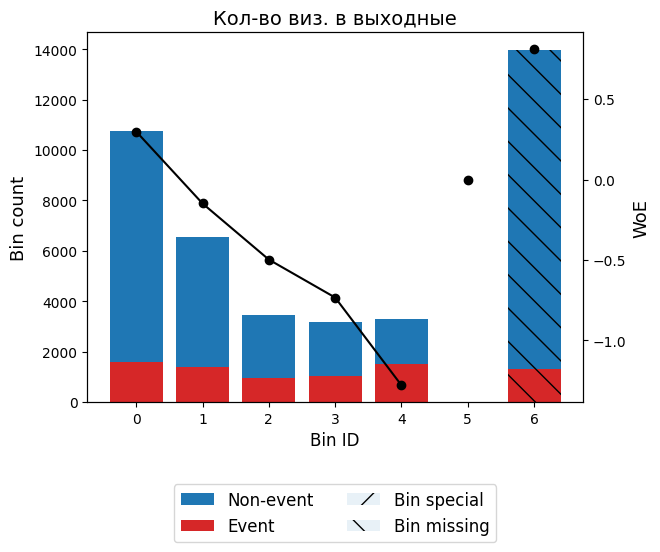

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.36178325
    IV (Jeffrey)             0.44730661
    JS (Jensen-Shannon)      0.05377274
    Hellinger                0.05481030
    Triangular               0.20748635
    KS                       0.21019223
    HHI                      0.22785984
    HHI (normalized)         0.09916982
    Cramer's V               0.23743624
    Quality score            0.88624910

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   122.083306 2.213460e-28 1.108465e-47  1.000000
        1      2    51.767786 6.246836e-13 1.209195e-19  1.000000
        2      3    19.352518 1.086758e-05 1.713001e-06  0.999998
        3      4   112.709666 2.498016e-26 4.067659e-37  1.000000



In [ ]:
optb_weekend_visits = binning_process.get_binned_variable("Кол-во виз. в выходные")
optb_weekend_visits.binning_table.plot(metric="woe")
optb_weekend_visits.binning_table.analysis()

Расчет IV WoE для "Ср. кол-во дней между покупками"

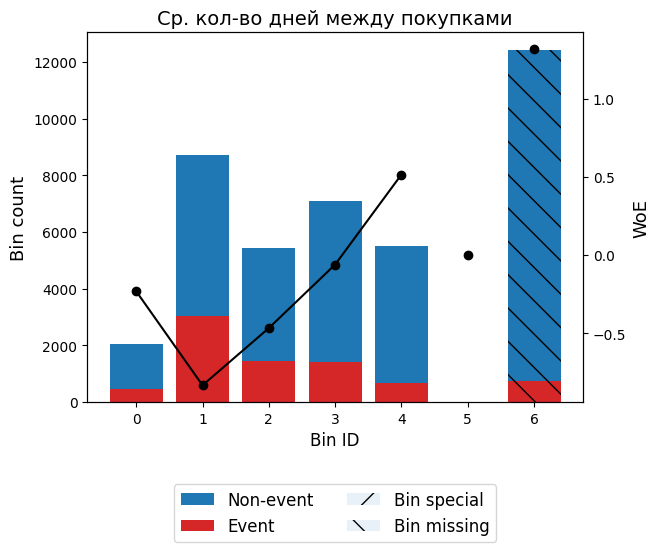

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.40321450
    IV (Jeffrey)             0.58699967
    JS (Jensen-Shannon)      0.06985611
    Hellinger                0.07155236
    Triangular               0.26717906
    KS                       0.31408700
    HHI                      0.20284393
    HHI (normalized)         0.06998459
    Cramer's V               0.19203296
    Quality score            0.75701305

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1   112.465738 2.825048e-26 1.946703e-29 1.000000e+00
        1      2    93.343617 4.395969e-22 1.000000e+00 1.110223e-16
        2      3    91.137490 1.340281e-21 1.000000e+00 1.110223e-16
        3      4   130.166754 3.767592e-30 1.000000e+00 1.110223e-16



In [ ]:
optb_meandays_betweensales = binning_process.get_binned_variable("Ср. кол-во дней между покупками")
optb_meandays_betweensales.binning_table.plot(metric="woe")
optb_meandays_betweensales.binning_table.analysis()


Расчет IV и WoE для "Разнообразие ТГ"

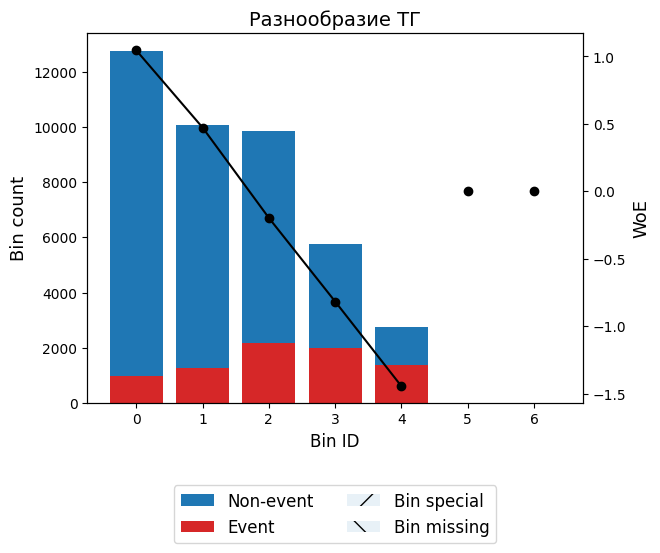

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.41848102
    IV (Jeffrey)             0.60789769
    JS (Jensen-Shannon)      0.07232089
    Hellinger                0.07408638
    Triangular               0.27656580
    KS                       0.32788834
    HHI                      0.23676037
    HHI (normalized)         0.10955377
    Cramer's V               0.31233725
    Quality score            0.69309045

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   165.523049 7.031567e-38  7.425730e-59       1.0
        1      2   308.479337 4.682668e-69 6.275082e-108       1.0
        2      3   287.354400 1.875070e-64 2.578254e-126       1.0
        3      4   180.406349 3.950922e-41  8.759173e-88       1.0



In [ ]:
optb_product_diversity = binning_process.get_binned_variable("Разнообразие ТГ")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

Расчет IV и WoE для "Среднее количество товаров в чеке"

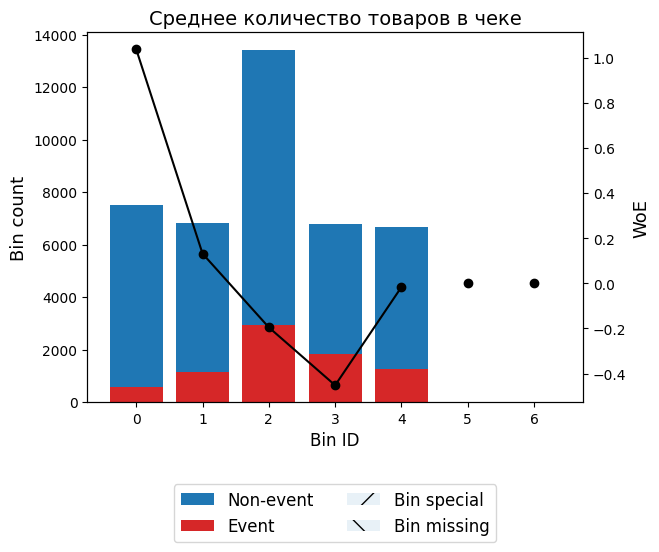

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.21306710
    IV (Jeffrey)             0.19302803
    JS (Jensen-Shannon)      0.02334808
    Hellinger                0.02372861
    Triangular               0.09056040
    KS                       0.15482852
    HHI                      0.21993170
    HHI (normalized)         0.08992031
    Cramer's V               0.15588065
    Quality score            0.64979387

  Monotonic trend        peak (concave)

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]     P[B > A]
        0      1   292.721573 1.269286e-65 2.428756e-102 1.000000e+00
        1      2    72.751475 1.470483e-17  1.662621e-20 1.000000e+00
        2      3    55.591826 8.919374e-14  7.255254e-22 1.000000e+00
        3      4   110.826997 6.456640e-26  1.000000e+00 1.110223e-16



In [ ]:
optb_product_diversity = binning_process.get_binned_variable("Среднее количество товаров в чеке")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

Расчет IV и WoE для "Разнообразие товаров"

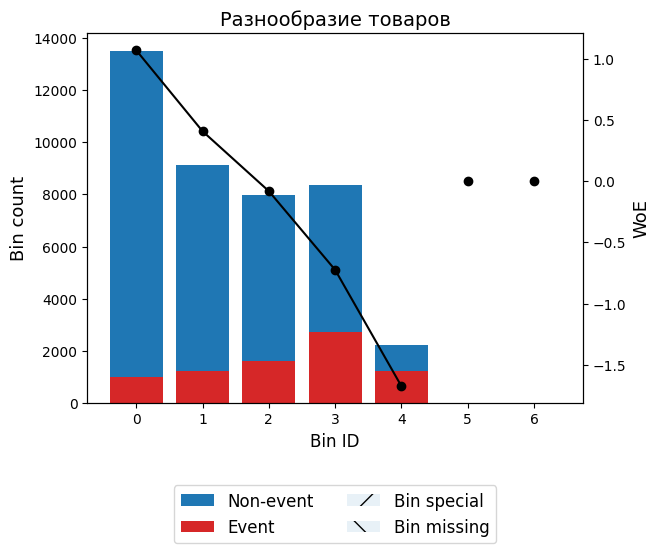

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.42566476
    IV (Jeffrey)             0.64319759
    JS (Jensen-Shannon)      0.07576478
    Hellinger                0.07796982
    Triangular               0.28764115
    KS                       0.32505155
    HHI                      0.23805344
    HHI (normalized)         0.11106235
    Cramer's V               0.32305177
    Quality score            0.63581720

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   221.556673 4.138460e-50  1.662946e-84       1.0
        1      2   140.705808 1.865832e-32  1.375921e-48       1.0
        2      3   316.217891 9.654760e-71 8.642755e-110       1.0
        3      4   397.753350 1.698265e-88 7.624165e-307       1.0



In [ ]:
optb_product_diversity = binning_process.get_binned_variable("Разнообразие товаров")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

Расчет IV и WoE для "Сумма потраченная в последний визит"

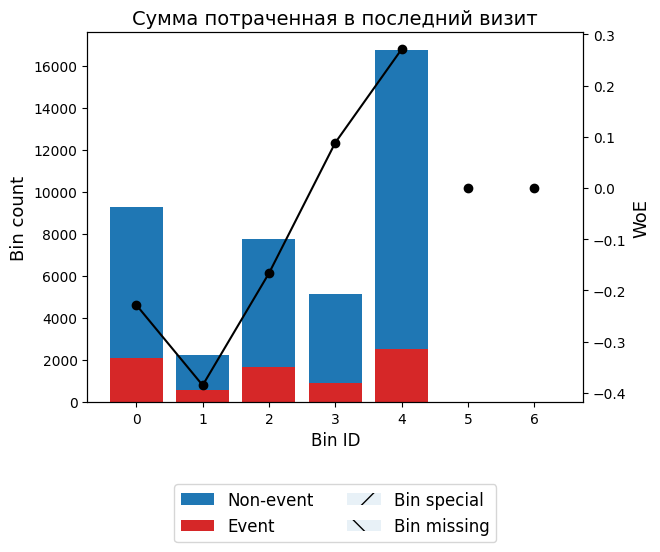

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.12790020
    IV (Jeffrey)             0.05549323
    JS (Jensen-Shannon)      0.00691502
    Hellinger                0.00692581
    Triangular               0.02757434
    KS                       0.11175967
    HHI                      0.27023351
    HHI (normalized)         0.14860576
    Cramer's V               0.09215951
    Quality score            0.19413113

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.326691 3.906676e-03  0.001413 9.985875e-01
        1      2    15.465517 8.402427e-05  0.999954 4.566176e-05
        2      3    30.944810 2.654711e-08  1.000000 4.350498e-11
        3      4    18.406250 1.784716e-05  0.999991 9.420675e-06



In [ ]:
optb_last_visit_spent = binning_process.get_binned_variable("Сумма потраченная в последний визит")
optb_last_visit_spent.binning_table.plot(metric="woe")
optb_last_visit_spent.binning_table.analysis()

Преобразование данных с использованием WoE

In [ ]:
X_transform = binning_process.transform(X, metric="woe", metric_missing="empirical")
print(X_transform.head())

   R(Давность)  F(Частота)  М(Сумма)  Кол-во виз. в выходные  \
0     2.153916    1.084740  0.459357                0.809754   
1     0.046750    1.084740  0.459357                0.809754   
2     0.906717    1.084740 -0.012577                0.809754   
3    -0.691314   -0.671523 -0.569079               -0.733519   
4     2.153916    1.084740 -0.012577                0.809754   

   Ср. кол-во дней между покупками  Разнообразие ТГ  \
0                         1.316300         1.046015   
1                         1.316300         1.046015   
2                         1.316300         1.046015   
3                        -0.832303        -0.197099   
4                         1.316300         1.046015   

   Среднее количество товаров в чеке  Разнообразие товаров  \
0                          -0.451498              1.069221   
1                           1.036624              1.069221   
2                           1.036624              1.069221   
3                          -0.016274

In [ ]:
X_transform =binning_process.transform(X,metric="woe",metric_missing="empirical")
X_transform

R(Давность)  F(Частота)  М(Сумма)  Кол-во виз. в выходные  \
0         2.153916    1.084740  0.459357                0.809754   
1         0.046750    1.084740  0.459357                0.809754   
2         0.906717    1.084740 -0.012577                0.809754   
3        -0.691314   -0.671523 -0.569079               -0.733519   
4         2.153916    1.084740 -0.012577                0.809754   
...            ...         ...       ...                     ...   
41191     0.906717    1.084740  0.459357                0.298122   
41192     2.153916    1.084740  0.459357                0.809754   
41193    -0.691314    1.084740 -0.569079                0.809754   
41194    -1.617646   -1.608765 -0.569079               -1.278899   
41195     0.906717   -0.040188 -0.012577               -0.733519   

       Ср. кол-во дней между покупками  Разнообразие ТГ  \
0                             1.316300         1.046015   
1                             1.316300         1.046015   
2                             1.316300         1.046015   
3                            -0.832303        -0.197099   
4                             1.316300         1.046015   
...                                ...              ...   
41191                        -0.832303         1.046015   
41192                         1.316300         1.046015   
41193                        -0.060091         1.046015   
41194                        -0.832303        -1.446106   
41195                         0.515444        -0.197099   

       Среднее количество товаров в чеке  Разнообразие товаров  \
0                              -0.451498              1.069221   
1                               1.036624              1.069221   
2                               1.036624              1.069221   
3                              -0.016274             -0.724209   
4                               1.036624              1.069221   
...                                  ...                   ...   
41191                           1.036624              1.069221   
41192                           1.036624              1.069221   
41193                          -0.016274              1.069221   
41194                          -0.016274             -0.724209   
41195                          -0.451498             -0.081210   

       Сумма потраченная в последний визит  
0                                 0.270982  
1                                 0.270982  
2                                 0.270982  
3                                 0.270982  
4                                 0.270982  
...                                    ...  
41191                             0.270982  
41192                             0.270982  
41193                             0.270982  
41194                            -0.166341  
41195                             0.270982  

[41196 rows x 9 columns]

### Построение логистической регресии

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
train_data2 = pd.read_excel('traindata6.xlsx')
train_data2

Клиент  Ср. кол-во дней между покупками  Разнообразие ТГ  \
0          client1                              NaN                2   
1         client10                              NaN                1   
2        client100                              NaN                1   
3       client1000                        30.583333                5   
4      client10000                              NaN                1   
...            ...                              ...              ...   
41191   client9995                         7.000000                1   
41192   client9996                              NaN                1   
41193   client9997                        60.000000                2   
41194   client9998                        15.516129               13   
41195   client9999                       191.500000                6   

       Доля визитов в вых.  Доля суммы покупки за последний визит  \
0                      NaN                               1.000000   
1                      NaN                               1.000000   
2                      NaN                               1.000000   
3                 0.384615                               0.128867   
4                      NaN                               1.000000   
...                    ...                                    ...   
41191             1.000000                               0.407669   
41192                  NaN                               1.000000   
41193                  NaN                               0.864451   
41194             0.281250                               0.015466   
41195             0.666667                               0.404439   

       R(Давность)  F(Частота)  М(Сумма)  Разнообразие товаров  \
0              616           4      2273                     4   
1               56           3      4757                     3   
2              145           1      7299                     1   
3               16          36     36495                    31   
4              425           5      8495                     5   
...            ...         ...       ...                   ...   
41191          303           3      3677                     3   
41192          425           1      2499                     1   
41193           27           3     17691                     3   
41194            2          80     38666                    37   
41195          212          20     13651                    20   

       Ср. кол-во товаров в чеке  Событие  
0                       2.250000        0  
1                       1.000000        0  
2                       1.000000        1  
3                       4.611111        1  
4                       1.000000        0  
...                          ...      ...  
41191                   1.000000        0  
41192                   1.000000        0  
41193                   8.000000        0  
41194                   3.100000        0  
41195                   2.100000        0  

[41196 rows x 11 columns]

In [ ]:
# Разделение данных на признаки и целевую переменную
X = train_data2.drop(columns=['Клиент', 'Событие'])
y = train_data2['Событие']
# Замена NaN значений на средние значения столбцов
X.fillna(X.mean(), inplace=True)

In [ ]:
y

0        0
1        0
2        1
3        1
4        0
        ..
41191    0
41192    0
41193    0
41194    0
41195    0
Name: Событие, Length: 41196, dtype: int64

Тривиальная модель

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X[['R(Давность)']], y, test_size=0.3, random_state=42)

# Обучение тривиальной модели
model_trivial = LogisticRegression()
model_trivial.fit(X_train, y_train)

# Предсказание вероятностей
y_probs_trivial = model_trivial.predict_proba(X_test)[:, 1]

# ROC AUC для тривиальной модели
fpr_trivial, tpr_trivial, _ = roc_curve(y_test, y_probs_trivial)
roc_auc_trivial = roc_auc_score(y_test, y_probs_trivial)

In [ ]:
# ROC AUC для тривиальной модели
fpr_trivial, tpr_trivial, _ = roc_curve(y_test, y_probs_trivial)
roc_auc_trivial = roc_auc_score(y_test, y_probs_trivial)

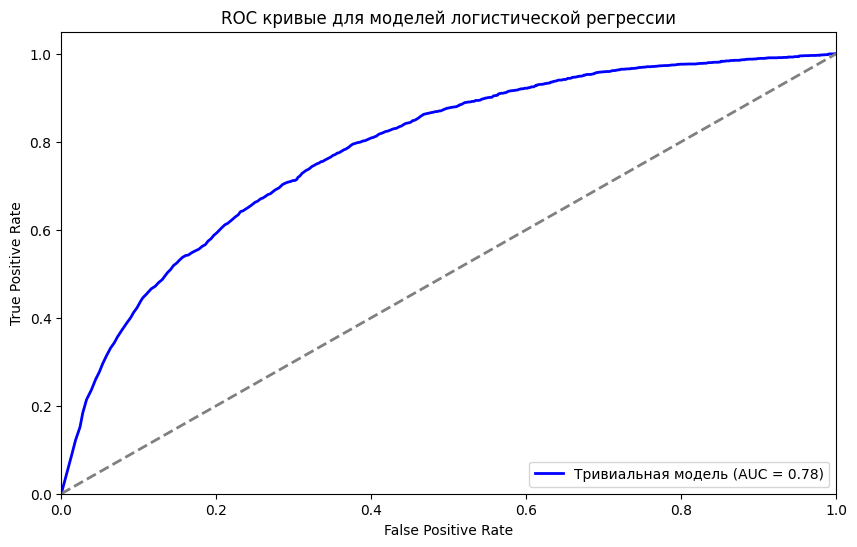

In [ ]:
# Визуализация ROC кривых
plt.figure(figsize=(10, 6))

plt.plot(fpr_trivial, tpr_trivial, color='blue', lw=2, label='Тривиальная модель (AUC = %0.2f)' % roc_auc_trivial)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые для моделей логистической регрессии')
plt.legend(loc="lower right")
plt.show()

Модель логистической регрессии с Lasso регуляризацией

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Обучение Ridge модели
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_ridge_all = LogisticRegression(penalty='l2', solver='liblinear')
model_ridge_all.fit(X_train, y_train)

# Предсказание вероятностей
y_probs_ridge_all = model_ridge_all.predict_proba(X_test)[:, 1]

# ROC AUC для Ridge модели
fpr_ridge_all, tpr_ridge_all, _ = roc_curve(y_test, y_probs_ridge_all)
roc_auc_ridge_all = roc_auc_score(y_test, y_probs_ridge_all)



In [ ]:
# Обучение Lasso модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_lasso_all = LogisticRegression(penalty='l1', solver='liblinear')
model_lasso_all.fit(X_train, y_train)

# Предсказание вероятностей
y_probs_lasso_all = model_lasso_all.predict_proba(X_test)[:, 1]

# ROC AUC для Lasso модели
fpr_lasso_all, tpr_lasso_all, _ = roc_curve(y_test, y_probs_lasso_all)
roc_auc_lasso_all = roc_auc_score(y_test, y_probs_lasso_all)


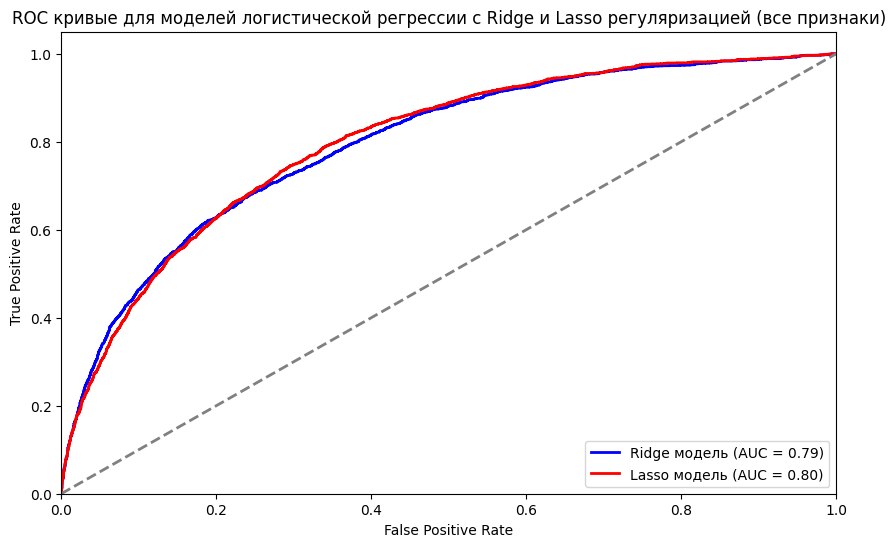

In [ ]:
# Визуализация ROC кривых
plt.figure(figsize=(10, 6))

plt.plot(fpr_ridge_all, tpr_ridge_all, color='blue', lw=2, label='Ridge модель (AUC = %0.2f)' % roc_auc_ridge_all)
plt.plot(fpr_lasso_all, tpr_lasso_all, color='red', lw=2, label='Lasso модель (AUC = %0.2f)' % roc_auc_lasso_all)

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые для моделей логистической регрессии с Ridge и Lasso регуляризацией (все признаки)')
plt.legend(loc="lower right")
plt.show()